<a href="https://colab.research.google.com/github/deblina0/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Statememt**


**Sentiment Analysis of Product Reviews:**

- **Description:** Analyse customer reviews to determine sentiment using natural language processing (NLP) techniques. This helps in understanding customer opinions and improving product features.

- **Why:** Sentiment analysis provides insights into customer satisfaction
and areas needing improvement.

- **Tasks:**

    ▪ Collect product review data.

    ▪ Example datasets Click Here

    ▪ Preprocess text data (tokenization, stop word removal).

    ▪ Apply NLP techniques (e.g., sentiment
    analysis using NLTK or spaCy).

    ▪ Visualize and interpret results

In [1]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_analysis.csv to sentiment_analysis.csv


In [2]:
import pandas as pd

In [3]:
sn = pd.read_csv("sentiment_analysis.csv")

In [4]:
sn

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [5]:
# import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [6]:
# Download stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
# Preprocess function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization and lowercasing
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Stop word removal
    return ' '.join(tokens)

In [8]:
# Apply preprocessing
sn['cleaned_text'] = sn['text'].apply(preprocess_text)

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [10]:
# Function to get sentiment
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [11]:
# Apply sentiment analysis
sn['predicted_sentiment'] = sn['cleaned_text'].apply(get_sentiment)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Count sentiments
sentiment_counts = sn['predicted_sentiment'].value_counts()

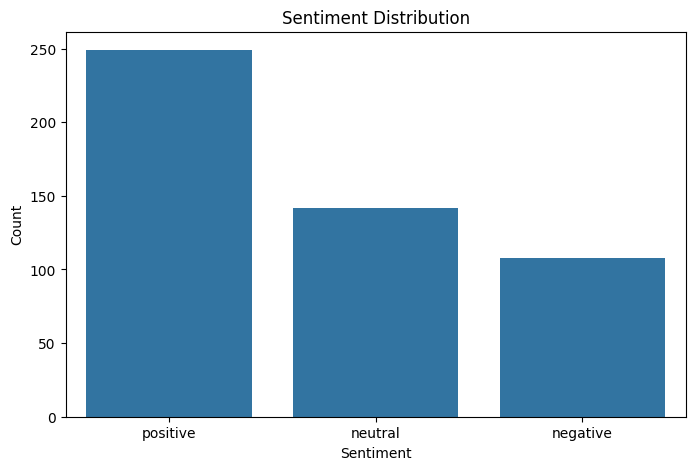

In [14]:
# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()